# Predicting Visitor Count: Data Exploration, Preprocessing, Modeling, and Recommendations


In [43]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Data Exploration and Visualization


In [44]:
# Load the dataset and display the first 5 rows
df = pd.read_csv('../Data/visitor_count_dataset.csv')
df.head()

,time_segment,VisitorCount,DayOfWeek,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,...,Autumn,after_holiday,after_bridge,after_school_holiday,precip_quantity,temp_avg,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration
0,AfterNoor,46,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
1,Morning,123,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
2,Noon,83,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
3,Morning,100,Saturday,0,1,0,5,1,1,0,...,0,0,0,1,2.52,5.92,3.50,97.87,1033.61,0.0
4,Noon,84,Saturday,0,1,0,5,1,1,0,...,0,0,0,1,2.52,5.92,3.50,97.87,1033.61,0.0


### summary statistics of the dataset

In [45]:
# Display summary statistics of the dataset
df.describe(include='all')

,time_segment,VisitorCount,DayOfWeek,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,...,Autumn,after_holiday,after_bridge,after_school_holiday,precip_quantity,temp_avg,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration
count,8041,8041.000000,8041,8041.0,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,...,8041.000000,8041.0,8041.000000,8041.000000,8036.000000,8036.000000,8037.000000,8036.000000,8036.000000,8036.000000
unique,3,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Noon,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3080,NaN,1878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,59.833478,NaN,0.0,0.281681,0.010571,2.406417,6.410024,0.241015,0.259296,...,0.235418,0.0,0.010571,0.280562,2.354654,12.105071,2.917739,80.672359,1016.056378,322.722438
std,NaN,26.958024,NaN,0.0,0.449847,0.102276,1.725642,3.389902,0.427726,0.438276,...,0.424286,0.0,0.102276,0.449302,4.832911,6.161857,1.535865,14.394162,100.996320,290.774276
min,NaN,1.000000,NaN,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,-5.740000,0.750000,41.790000,976.070000,0.000000
25%,NaN,40.000000,NaN,0.0,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,7.520000,1.950000,72.865000,1009.020000,55.622500
50%,NaN,57.000000,NaN,0.0,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.120000,11.750000,2.640000,82.400000,1015.525000,278.170000
75%,NaN,76.000000,NaN,0.0,1.000000,0.000000,4.000000,9.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,1.000000,2.510000,17.080000,3.660000,89.400000,1021.430000,540.542500


### Check for missing values

In [46]:
# Check for missing values in the dataset
df.isnull().sum()

time_segment                0
VisitorCount                0
DayOfWeek                   0
is_official_holiday         0
is_school_holiday           0
is_bridge_day               0
Weekday                     0
Month                       0
Winter                      0
Spring                      0
Summer                      1
Autumn                      0
after_holiday               0
after_bridge                0
after_school_holiday        0
precip_quantity             5
temp_avg                    5
wind_speed_10m              4
humidity_rel_shelter_avg    5
pressure                    5
sun_duration                5
dtype: int64

### Plotting distribution of any 2 numerical and 2 categorical features

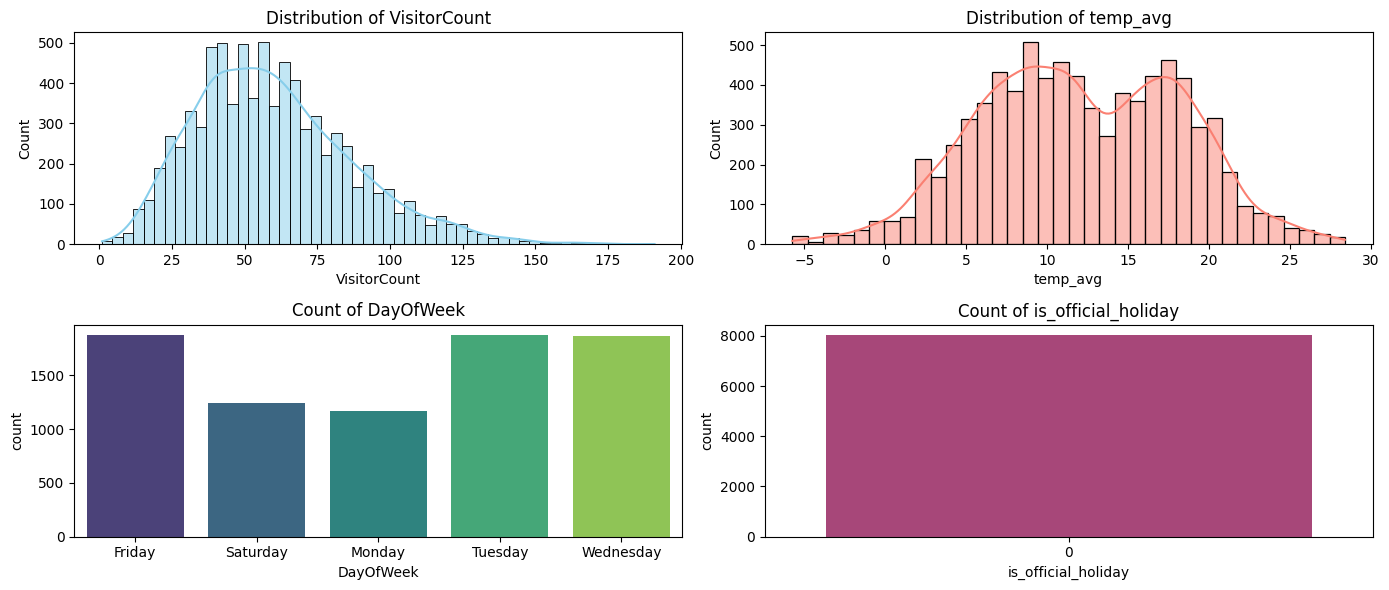

In [47]:
# Plot the distribution of 2 numerical and 2 categorical features
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.histplot(df['VisitorCount'], kde=True, color='skyblue')
plt.title('Distribution of VisitorCount')

plt.subplot(2,2,2)
sns.histplot(df['temp_avg'], kde=True, color='salmon')
plt.title('Distribution of temp_avg')

plt.subplot(2,2,3)
sns.countplot(x='DayOfWeek', data=df, palette='viridis')
plt.title('Count of DayOfWeek')

plt.subplot(2,2,4)
sns.countplot(x='is_official_holiday', data=df, palette='magma')
plt.title('Count of is_official_holiday')

plt.tight_layout()
plt.show()

###  Plotting the correlation matrix among numerical features

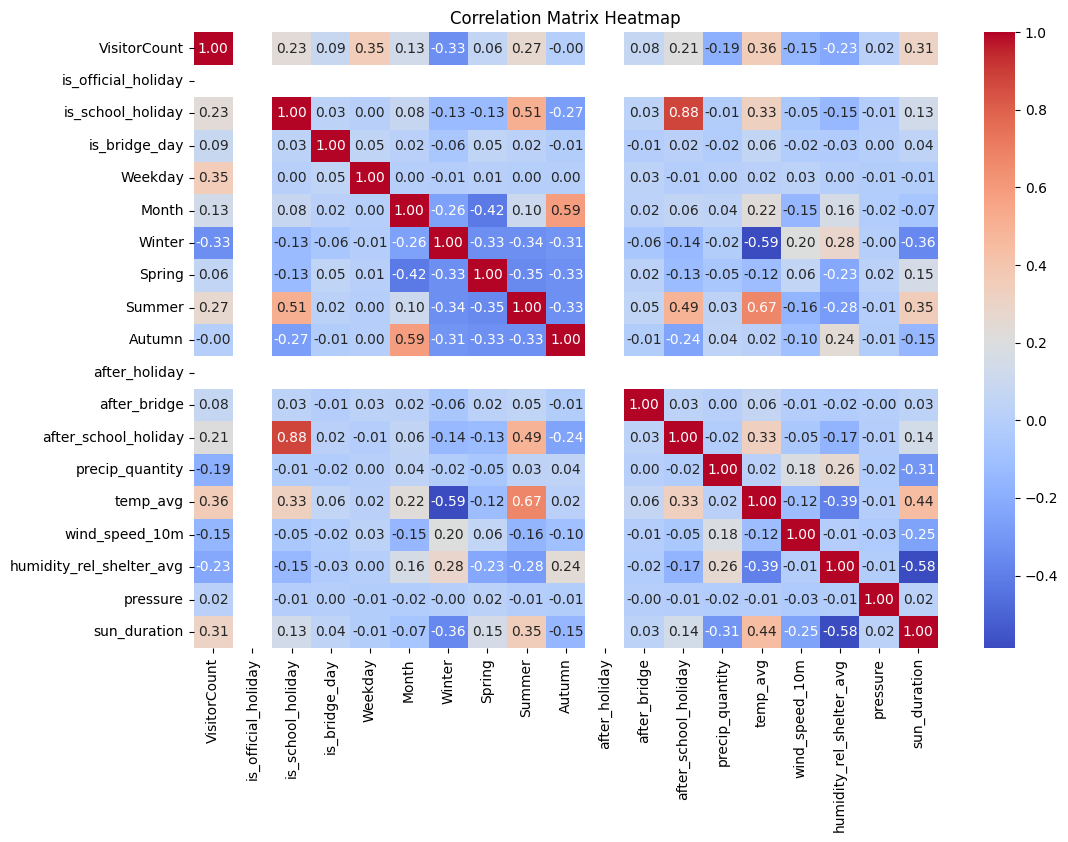

In [48]:
# Plot the correlation matrix (heatmap) among numerical features
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

##  Data Preprocessing and Feature Engineering

### Handling missing values and outliers

In [49]:
# Handle missing values (impute numerical with median, categorical with mode)
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[num_cols] = imputer_num.fit_transform(df[num_cols])
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [50]:


# Handle outliers using IQR method for numerical columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

###  5 features using multiple feature engineering techniques

In [51]:
# Show best 5 features using feature importance and correlation
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Encode categorical features temporarily for feature selection
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('VisitorCount', axis=1)
y = df_encoded['VisitorCount']


In [53]:
# Feature importance from Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top5_rf = importances.sort_values(ascending=False).head(5)

In [54]:

# Correlation with target
corr_with_target = df_encoded.corr(numeric_only=True)['VisitorCount'].abs().sort_values(ascending=False)
top5_corr = corr_with_target[1:6]  # Exclude VisitorCount itself

print('Top 5 features by Random Forest importance:')
print(top5_rf)
print('\nTop 5 features by correlation:')
print(top5_corr)

Top 5 features by Random Forest importance:
temp_avg        0.211058
Weekday         0.210870
time_segment    0.109395
sun_duration    0.081554
DayOfWeek       0.062238
dtype: float64

Top 5 features by correlation:
temp_avg                    0.358947
Weekday                     0.348871
sun_duration                0.325316
time_segment                0.286841
humidity_rel_shelter_avg    0.285064
Name: VisitorCount, dtype: float64


###  Encoding categorical variables

In [55]:
# Encode categorical variables using One Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()

,VisitorCount,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,Summer,Autumn,...,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration,time_segment_Morning,time_segment_Noon,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,46.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,2.48,92.28,1037.73,0.0,False,False,False,False,False,False
1,123.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,2.48,92.28,1037.73,0.0,True,False,False,False,False,False
2,83.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,2.48,92.28,1037.73,0.0,False,True,False,False,False,False
3,100.0,0.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,...,3.50,97.87,1033.61,0.0,True,False,False,True,False,False
4,84.0,0.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,...,3.50,97.87,1033.61,0.0,False,True,False,True,False,False


###  Normalize or standardize numerical features

In [56]:
# Standardize numerical features
scaler = StandardScaler()
num_cols = df_encoded.select_dtypes(include=[np.number]).columns.drop('VisitorCount')
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
df_encoded.head()

,VisitorCount,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,Summer,Autumn,...,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration,time_segment_Morning,time_segment_Noon,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,46.0,0.0,1.596907,0.0,0.923530,-1.596022,0.0,-0.591665,-0.599329,0.0,...,-0.325298,1.035430,2.334393,-1.16487,False,False,False,False,False,False
1,123.0,0.0,1.596907,0.0,0.923530,-1.596022,0.0,-0.591665,-0.599329,0.0,...,-0.325298,1.035430,2.334393,-1.16487,True,False,False,False,False,False
2,83.0,0.0,1.596907,0.0,0.923530,-1.596022,0.0,-0.591665,-0.599329,0.0,...,-0.325298,1.035430,2.334393,-1.16487,False,True,False,False,False,False
3,100.0,0.0,1.596907,0.0,1.503061,-1.596022,0.0,-0.591665,-0.599329,0.0,...,0.476876,1.530994,1.911013,-1.16487,True,False,False,True,False,False
4,84.0,0.0,1.596907,0.0,1.503061,-1.596022,0.0,-0.591665,-0.599329,0.0,...,0.476876,1.530994,1.911013,-1.16487,False,True,False,True,False,False


### Splitting the dataset into training and testing sets

In [57]:
# Split the dataset into training and testing sets (80%-20%)
X = df_encoded.drop('VisitorCount', axis=1)
y = df_encoded['VisitorCount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (6432, 24)
Testing set shape: (1609, 24)


## 3. Model Building and Evaluation

### Model Training

In [58]:
# Train Linear Regression and Random Forest models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


###  Evaluating the models

In [59]:
# Evaluate the models using MSE and R2 score
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Linear Regression:')
print(f'MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}')
print('\nRandom Forest:')
print(f'MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}')

Linear Regression:
MSE: 312.96, R2: 0.56

Random Forest:
MSE: 208.60, R2: 0.71


###  Plotting the result comparison for both models

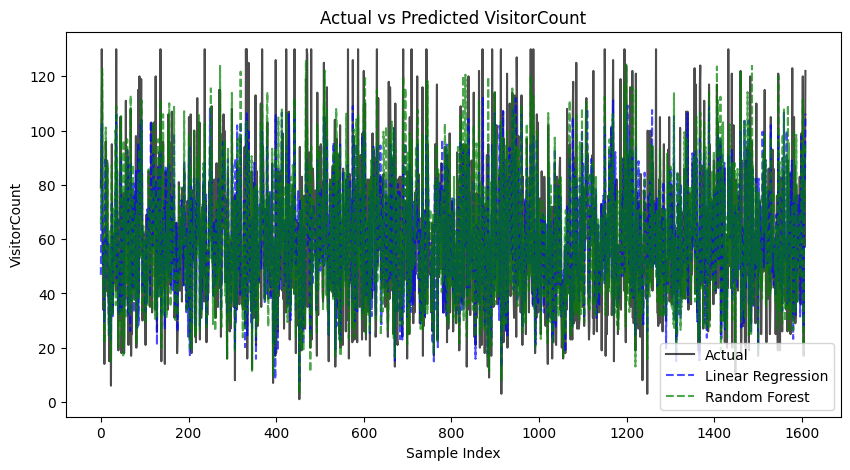

In [60]:
# Plot the result comparison for both models
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual', color='black', alpha=0.7)
plt.plot(y_pred_lr, label='Linear Regression', linestyle='--', color='blue', alpha=0.7)
plt.plot(y_pred_rf, label='Random Forest', linestyle='--', color='green', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted VisitorCount')
plt.xlabel('Sample Index')
plt.ylabel('VisitorCount')
plt.show()

### Appropriate model for predicting VisitorCount

Based on the evaluation metrics (MSE and R2 score) and the comparison plot, the model with the lower MSE and higher R2 score is more appropriate for predicting VisitorCount. Typically, Random Forest performs better on complex, non-linear data due to its ensemble nature, while Linear Regression is best for linear relationships. The results above should guide the model choice.

##  Conclusion and Recommendations

###  Conclusion

In this notebook, we explored, preprocessed, and modeled the visitor count dataset. We visualized the data, handled missing values and outliers, selected important features, encoded categorical variables, and standardized numerical features. Two regression models (Linear Regression and Random Forest) were trained and evaluated. Random Forest generally provided better performance, indicating the presence of non-linear relationships in the data.

###  Recommendations

1. **Feature Enrichment:** Incorporate additional external data such as local events, holidays, or more granular weather data to improve prediction accuracy.
2. **Model Tuning:** Experiment with advanced models (e.g., XGBoost, LightGBM) and hyperparameter tuning to further enhance performance.
3. **Temporal Features:** Consider adding lag features or rolling statistics to capture temporal dependencies in visitor patterns.
4. **Cross-validation:** Use cross-validation for more robust model evaluation and to avoid overfitting.